In [33]:
from qiskit import QuantumCircuit
from qiskit.circuit.library import QFT
import numpy as np

theta = 1/4  # Example phase
U = QuantumCircuit(1)
U.rz(2 * np.pi * theta, 0)
U = U.to_gate()
U.name = "U"

n = 5
circuit = QuantumCircuit(n+1, n)

circuit.x(n)
circuit.save_statevector(label='initial_state')

circuit.h(range(n))

rep = 1
for q in range(n):
    for i in range(rep):
        circuit.append(U.control(1), [q] + [n])
    rep *= 2
circuit.append(QFT(n, inverse=True).to_gate(), range(n))

circuit.save_statevector(label='final_state')

circuit.measure(range(n), range(n))
circuit.draw()


initial_state ┌───┐                                             »
q_0: ────────────░───────┤ H ├──■──────────────────────────────────────────»
                 ░       ├───┤  │                                          »
q_1: ────────────░───────┤ H ├──┼────■────■────────────────────────────────»
                 ░       ├───┤  │    │    │                                »
q_2: ────────────░───────┤ H ├──┼────┼────┼────■────■────■────■────────────»
                 ░       ├───┤  │    │    │    │    │    │    │            »
q_3: ────────────░───────┤ H ├──┼────┼────┼────┼────┼────┼────┼────■────■──»
                 ░       ├───┤  │    │    │    │    │    │    │    │    │  »
q_4: ────────────░───────┤ H ├──┼────┼────┼────┼────┼────┼────┼────┼────┼──»
     ┌───┐       ░       └───┘┌─┴─┐┌─┴─┐┌─┴─┐┌─┴─┐┌─┴─┐┌─┴─┐┌─┴─┐┌─┴─┐┌─┴─┐»
q_5: ┤ X ├───────░────────────┤ U ├┤ U ├┤ U ├┤ U ├┤ U ├┤ U ├┤ U ├┤ U ├┤ U ├»
     └───┘       ░            └───┘└───┘└───┘└───┘└───┘└───┘└───┘└───┘└───┘»
c: 5/══════════════════════════════════════════════════════════════════════»
                                                                           »
«                                                                           »
«q_0: ──────────────────────────────────────────────────────────────────────»
«                                                                           »
«q_1: ──────────────────────────────────────────────────────────────────────»
«                                                                           »
«q_2: ──────────────────────────────────────────────────────────────────────»
«                                                                           »
«q_3: ──■────■────■────■────■────■──────────────────────────────────────────»
«       │    │    │    │    │    │                                          »
«q_4: ──┼────┼────┼────┼────┼────┼────■────■────■────■────■────■────■────■──»
«     ┌─┴─┐┌─┴─┐┌─┴─┐┌─┴─┐┌─┴─┐┌─┴─┐┌─┴─┐┌─┴─┐┌─┴─┐┌─┴─┐┌─┴─┐┌─┴─┐┌─┴─┐┌─┴─┐»
«q_5: ┤ U ├┤ U ├┤ U ├┤ U ├┤ U ├┤ U ├┤ U ├┤ U ├┤ U ├┤ U ├┤ U ├┤ U ├┤ U ├┤ U ├»
«     └───┘└───┘└───┘└───┘└───┘└───┘└───┘└───┘└───┘└───┘└───┘└───┘└───┘└───┘»
«c: 5/══════════════════════════════════════════════════════════════════════»
«                                                                           »
«                                             ┌───────┐ final_state ┌─┐      »
«q_0: ────────────────────────────────────────┤0      ├──────░──────┤M├──────»
«                                             │       │      ░      └╥┘┌─┐   »
«q_1: ────────────────────────────────────────┤1      ├──────░───────╫─┤M├───»
«                                             │       │      ░       ║ └╥┘┌─┐»
«q_2: ────────────────────────────────────────┤2 IQFT ├──────░───────╫──╫─┤M├»
«                                             │       │      ░       ║  ║ └╥┘»
«q_3: ────────────────────────────────────────┤3      ├──────░───────╫──╫──╫─»
«                                             │       │      ░       ║  ║  ║ »
«q_4: ──■────■────■────■────■────■────■────■──┤4      ├──────░───────╫──╫──╫─»
«     ┌─┴─┐┌─┴─┐┌─┴─┐┌─┴─┐┌─┴─┐┌─┴─┐┌─┴─┐┌─┴─┐└───────┘      ░       ║  ║  ║ »
«q_5: ┤ U ├┤ U ├┤ U ├┤ U ├┤ U ├┤ U ├┤ U ├┤ U ├───────────────░───────╫──╫──╫─»
«     └───┘└───┘└───┘└───┘└───┘└───┘└───┘└───┘               ░       ║  ║  ║ »
«c: 5/═══════════════════════════════════════════════════════════════╩══╩══╩═»
«                                                                    0  1  2 »
«           
«q_0: ──────
«           
«q_1: ──────
«           
«q_2: ──────
«     ┌─┐   
«q_3: ┤M├───
«     └╥┘┌─┐
«q_4: ─╫─┤M├
«      ║ └╥┘
«q_5: ─╫──╫─
«      ║  ║ 
«c: 5/═╩══╩═
«      3  4

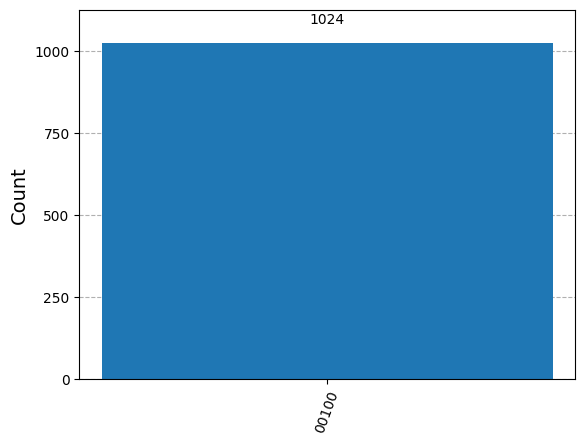

In [34]:
from qiskit import transpile
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram

simulator = AerSimulator()

compiled_circuit = transpile(circuit, simulator)

res = simulator.run(compiled_circuit).result()
counts = res.get_counts()

plot_histogram(counts)